 COVID-19 Novel Coronavirus Dataset

In [35]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import plotly.graph_objects as go
import pycountry
import plotly.express as px

# Data Import, Preprocessing and EDA

In [36]:
df = pd.read_csv('../Downloads/covid_19_data.csv',parse_dates=['Last Update'])
df


,SNo,ObservationDate,Province/State,Country/Region,Last Update,Confirmed,Deaths,Recovered
0,1,01/22/2020,Anhui,Mainland China,2020-01-22 17:00:00,1.0,0.0,0.0
1,2,01/22/2020,Beijing,Mainland China,2020-01-22 17:00:00,14.0,0.0,0.0
2,3,01/22/2020,Chongqing,Mainland China,2020-01-22 17:00:00,6.0,0.0,0.0
3,4,01/22/2020,Fujian,Mainland China,2020-01-22 17:00:00,1.0,0.0,0.0
4,5,01/22/2020,Gansu,Mainland China,2020-01-22 17:00:00,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...
7009,7010,03/19/2020,NaN,Jersey,2020-03-17 18:33:03,0.0,0.0,0.0
7010,7011,03/19/2020,NaN,Puerto Rico,2020-03-17 16:13:14,0.0,0.0,0.0
7011,7012,03/19/2020,NaN,Republic of the Congo,2020-03-17 21:33:03,0.0,0.0,0.0
7012,7013,03/19/2020,NaN,The Bahamas,2020-03-19 12:13:38,0.0,0.0,0.0


In [37]:

df.rename(columns={'ObservationDate':'Date', 'Country/Region':'Country'}, inplace=True)

df_confirmed = pd.read_csv("../Downloads/time_series_covid_19_confirmed.csv")
#print(df_confirmed)
df_recovered = pd.read_csv("../Downloads/time_series_covid_19_recovered.csv")
df_deaths = pd.read_csv("../Downloads/time_series_covid_19_deaths.csv")
df_confirmed.rename(columns={'Country/Region':'Country'}, inplace=True)
df_recovered.rename(columns={'Country/Region':'Country'}, inplace=True)
df_deaths.rename(columns={'Country/Region':'Country'}, inplace=True)


In [38]:
df2 = df.groupby(["Date", "Country", "Province/State"])[['SNo', 'Date', 'Province/State', 'Country', 'Confirmed', 'Deaths', 'Recovered']].sum().reset_index()

In [39]:
df2

,Date,Country,Province/State,SNo,Confirmed,Deaths,Recovered
0,01/22/2020,Hong Kong,Hong Kong,13,0.0,0.0,0.0
1,01/22/2020,Macau,Macau,21,1.0,0.0,0.0
2,01/22/2020,Mainland China,Anhui,1,1.0,0.0,0.0
3,01/22/2020,Mainland China,Beijing,2,14.0,0.0,0.0
4,01/22/2020,Mainland China,Chongqing,3,6.0,0.0,0.0
...,...,...,...,...,...,...,...
4080,03/19/2020,US,Virginia,6834,99.0,2.0,0.0
4081,03/19/2020,US,Washington,6739,1376.0,74.0,0.0
4082,03/19/2020,US,West Virginia,6977,2.0,0.0,0.0
4083,03/19/2020,US,Wisconsin,6807,159.0,0.0,0.0


In [40]:
df.query('Country=="Mainland China"').groupby("Last Update")[['Confirmed', 'Deaths', 'Recovered']].sum().reset_index()

,Last Update,Confirmed,Deaths,Recovered
0,2020-01-22 17:00:00,547.0,17.0,28.0
1,2020-01-23 17:00:00,639.0,18.0,30.0
2,2020-01-24 17:00:00,916.0,26.0,36.0
3,2020-01-25 17:00:00,1399.0,42.0,39.0
4,2020-01-26 16:00:00,2062.0,56.0,49.0
...,...,...,...,...
760,2020-03-19 01:13:06,1378.0,8.0,1318.0
761,2020-03-19 05:13:10,480.0,8.0,380.0
762,2020-03-19 10:13:14,69573.0,3134.0,59435.0
763,2020-03-19 14:33:08,134.0,2.0,91.0


## By Country (Sorted)

In [41]:
df.groupby("Country")[['Confirmed', 'Deaths', 'Recovered']].sum().reset_index()

,Country,Confirmed,Deaths,Recovered
0,Azerbaijan,1.0,0.0,0.0
1,"('St. Martin',)",2.0,0.0,0.0
2,Afghanistan,161.0,0.0,4.0
3,Albania,389.0,11.0,0.0
4,Algeria,561.0,34.0,108.0
...,...,...,...,...
179,Vatican City,4.0,0.0,0.0
180,Venezuela,140.0,0.0,0.0
181,Vietnam,1141.0,0.0,518.0
182,Zambia,4.0,0.0,0.0


# Visualizations

In [42]:
df.groupby('Date').sum()

,SNo,Confirmed,Deaths,Recovered
Date,,,,
01/22/2020,741,555.0,17.0,28.0
01/23/2020,2829,653.0,18.0,30.0
01/24/2020,4305,941.0,26.0,36.0
01/25/2020,6490,1438.0,42.0,39.0
01/26/2020,9071,2118.0,56.0,52.0
01/27/2020,12342,2927.0,82.0,61.0
01/28/2020,15262,5578.0,131.0,107.0
01/29/2020,18711,6165.0,133.0,126.0
01/30/2020,23345,8235.0,171.0,143.0


## Summary Plot of Worldwide Cases - Confirmed, Deaths & Recovered

In [43]:
confirmed = df.groupby('Date').sum()['Confirmed'].reset_index()
deaths = df.groupby('Date').sum()['Deaths'].reset_index()
recovered = df.groupby('Date').sum()['Recovered'].reset_index()

In [44]:
confirmed.head()


,Date,Confirmed
0,01/22/2020,555.0
1,01/23/2020,653.0
2,01/24/2020,941.0
3,01/25/2020,1438.0
4,01/26/2020,2118.0


2)MATPLOTLIB BAR GRAPH-are mainly used to compare things belongs to different groups,when we try to measure changes over time or date /changes are larger.

Text(0.5, 1.0, 'COVID 19 BAR GRAPH')

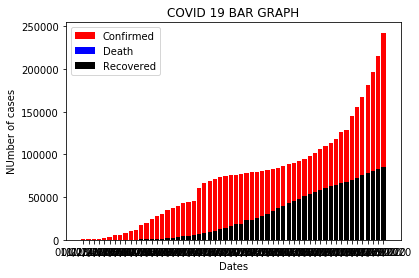

In [45]:
from matplotlib import pyplot as plt

plt.bar(confirmed['Date'],confirmed['Confirmed'],label="Confirmed",color='r')
plt.bar(deaths['Date'],deaths['Deaths'],label="Death",color='b')
plt.bar(recovered['Date'],recovered['Recovered'],label="Recovered",color='k')
plt.legend()

plt.xlabel("Dates")
plt.ylabel("NUmber of cases")

plt.title('COVID 19 BAR GRAPH')


PLOTLY- BAR GRAPH

The goal of plotly.py is to provide a pleasant Python interface for creating figure specifications 
for display in the Plotly.js JavaScript library. 
In Plotly.js, a figure is specified by a declarative JSON data structure, 
and so the ultimate responsibility of plotly.py is to produce Python dictionaries 
that can be serialized into a JSON data structure that represents a valid figure.

In [67]:
fig = go.Figure()
fig.add_trace(go.Bar(x=confirmed['Date'],
                y=confirmed['Confirmed'],
                name='Confirmed',
                marker_color='blue'
                ))#New traces can be added to a graph object figure using the add_trace method. 
fig.add_trace(go.Bar(x=deaths['Date'],
                y=deaths['Deaths'],
                name='Deaths',
                marker_color='Red'
                ))
fig.add_trace(go.Bar(x=recovered['Date'],
                y=recovered['Recovered'],
                name='Recovered',
                marker_color='Green'
                ))

fig.update_layout(
    title='Worldwide Corona Virus Cases - Confirmed, Deaths, Recovered (Bar Chart)',
    xaxis_tickfont_size=14,
    yaxis=dict(
        title='Number of Cases',
        titlefont_size=16,
        tickfont_size=14,
    ),
    legend=dict(
        x=0,
        y=1.0,
        bgcolor='rgba(255, 255, 255, 0)',
        bordercolor='rgb(255, 255, 255, 0)'
    ),
    barmode='stack',
    bargap=0.15, # gap between bars of adjacent location coordinates.
    bargroupgap=0.1 # gap between bars of the same location coordinate.
)
fig.show()

MATPLOTLIB- SACTTER PLOT-we use scatter plot to classify twi variables looking for correlation or growth.

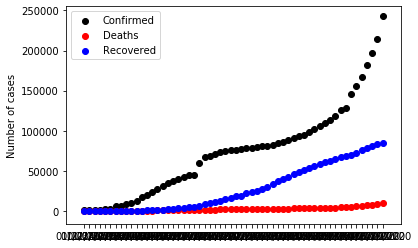

In [47]:
from matplotlib import pyplot as plt

plt.scatter(x=confirmed['Date'],y=confirmed['Confirmed'],label='Confirmed',color='k')
plt.scatter(x=deaths['Date'],y=deaths['Deaths'],label="Deaths",color='r')
plt.scatter(x=recovered['Date'],y=recovered['Recovered'],label="Recovered",color='b')

#plt.xlabel('Dates')
plt.ylabel('Number of cases')

plt.legend()
plt.show()


In [68]:
fig = go.Figure()
fig.add_trace(go.Scatter(x=confirmed['Date'], 
                         y=confirmed['Confirmed'],
                         mode='lines',
                         name='Confirmed',
                         line=dict(color='blue', width=2)
                        ))
fig.add_trace(go.Scatter(x=deaths['Date'], 
                         y=deaths['Deaths'],
                         mode='lines+markers',
                         name='Deaths',
                         line=dict(color='Red', width=2)
                        ))
fig.add_trace(go.Scatter(x=recovered['Date'], 
                         y=recovered['Recovered'],
                         mode='lines+markers',
                         name='Recovered',
                         line=dict(color='Green', width=2)
                        ))
fig.update_layout(
    title='Worldwide Corona Virus Cases - Confirmed, Deaths, Recovered (Line Chart)',
    xaxis_tickfont_size=14,
    yaxis=dict(
        title='Number of Cases',
        titlefont_size=16,
        tickfont_size=14,
    ),
    legend=dict(
        x=0,
        y=1.0,
        bgcolor='rgba(255, 255, 255, 0)',
        bordercolor='rgba(255, 255, 255, 0)'
    )
)
fig.show()

HISTGRAM IN MATPLOTLIB
Histogram :Diff btw histogram nd bar graph?
In statistics, a histogram is representation of the distribution of numerical data,
where the data are binned and the count for each bin is represented. 
More generally, in plotly a histogram is an aggregated bar chart, 
with several possible aggregation functions (e.g. sum, average, count...). 
Also, the data to be binned can be numerical data but also categorical or date data.


Compute and draw the histogram of x.
The return value is a tuple (n, bins, patches) or ([n0, n1, ...], bins, [patches0, patches1,...])

Text(0.5, 1.0, 'info')

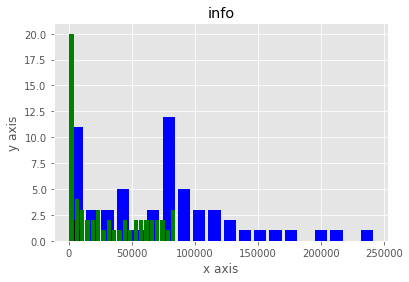

In [49]:
from matplotlib import pyplot as plt
from matplotlib import style
#print(style.available)
#style.use('grayscale')
style.use("ggplot")
#print(style.available)
#population_ages=[22,55,62,45,21,22,34,42,41,99,102,110,120,121,122,130,111,150,112,80,75,65,54,44,43,42,48]  
bins=20
df=confirmed['Confirmed']
df1=deaths['Deaths']
df2=recovered['Recovered']
plt.hist(df,bins,histtype='barstacked',rwidth=0.8,color="b")
plt.hist(df1,bins,histtype='barstacked',rwidth=0.8,color="k")
plt.hist(df2,bins,histtype='barstacked',rwidth=0.8,color='g')
plt.xlabel('x axis')
plt.ylabel('y axis')
 

plt.title('info')
 

Plotly Express is a terse, consistent, high-level API for rapid data exploration and figure generation. 
Plotly Express is the easy-to-use, high-level interface to Plotly, 
which operates on "tidy" data and produces easy-to-style figures.
Every Plotly Express function returns a graph_objects.
Figure object whose data and layout has been pre-populated according to the provided arguments.

if we are using df then, plotly.express is good,otherwise go.

In [69]:
import plotly.express as px
df = px.data.tips()
print(df.head())
fig = px.histogram(df, x="total_bill", nbins=20)
fig.show()
#By default, the number of bins is chosen so that this number is 
#comparable to the typical number of samples in a bin.
#This number can be customized, as well as the range of values.

   total_bill   tip     sex smoker  day    time  size
0       16.99  1.01  Female     No  Sun  Dinner     2
1       10.34  1.66    Male     No  Sun  Dinner     3
2       21.01  3.50    Male     No  Sun  Dinner     3
3       23.68  3.31    Male     No  Sun  Dinner     2
4       24.59  3.61  Female     No  Sun  Dinner     4


In [51]:
import plotly.graph_objects as go

import numpy as np
np.random.seed(1)

x = np.random.randn(500)
#print(x)
fig = go.Figure(data=[go.Histogram(x=x)])
fig.show()



MATPLOTLIB
PIE CHART-pie chart:is used to show the percentage or proportional data(slice)


In [72]:
raw_data = {'officer_name': ['Jason', 'Molly', 'Tina', 'Jake', 'Amy'],
        'jan_arrests': [4, 24, 31, 2, 3],
        'feb_arrests': [25, 94, 57, 62, 70],
        'march_arrests': [5, 43, 23, 23, 51]}
df = pd.DataFrame(raw_data, columns = ['officer_name', 'jan_arrests', 'feb_arrests', 'march_arrests'])
df

,officer_name,jan_arrests,feb_arrests,march_arrests
0,Jason,4,25,5
1,Molly,24,94,43
2,Tina,31,57,23
3,Jake,2,62,23
4,Amy,3,70,51


In [73]:
# Create a column with the total arrests for each officer
df['total_arrests'] = df['jan_arrests'] + df['feb_arrests'] + df['march_arrests']
df

,officer_name,jan_arrests,feb_arrests,march_arrests,total_arrests
0,Jason,4,25,5,34
1,Molly,24,94,43,161
2,Tina,31,57,23,111
3,Jake,2,62,23,87
4,Amy,3,70,51,124


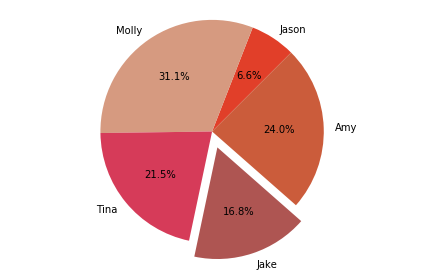

In [75]:
# Create a list of colors (from iWantHue)
colors = ["#E13F29", "#D69A80", "#D63B59", "#AE5552", "#CB5C3B", "#EB8076", "#96624E"]
#https://www.color-blindness.com/color-name-hue/
# Create a pie chart
plt.pie(
    # using data total)arrests
    df['total_arrests'],
    labels=df['officer_name'],
    shadow=False,
    # with colors
    colors=colors,
    # with one slide exploded out
    explode=(0, 0, 0, 0.15, 0),
    # with the start angle at 90%
    startangle=45,
    # with the percent listed as a fraction
    autopct='%1.1f%%',
    )

# View the plot drop above
plt.axis('equal')

# View the plot
plt.tight_layout()
plt.show()

In [55]:
import plotly.graph_objs as go
import pandas as pd
from plotly.offline import init_notebook_mode, plot, iplot
init_notebook_mode(connected=True)
labels = df['feb_arrests'].value_counts().index
values = df['march_arrests'].value_counts().values

trace = go.Pie(labels=labels, values=values)#labels=feb_arrests

iplot([trace], filename='basic_pie_chart')

In [76]:
import plotly.express as px
# This dataframe has 244 lines, but 4 distinct values for `day`
df = px.data.tips()
print(df)
fig = px.pie(df, values='tip', names='day')
fig.show()


     total_bill   tip     sex smoker   day    time  size
0         16.99  1.01  Female     No   Sun  Dinner     2
1         10.34  1.66    Male     No   Sun  Dinner     3
2         21.01  3.50    Male     No   Sun  Dinner     3
3         23.68  3.31    Male     No   Sun  Dinner     2
4         24.59  3.61  Female     No   Sun  Dinner     4
..          ...   ...     ...    ...   ...     ...   ...
239       29.03  5.92    Male     No   Sat  Dinner     3
240       27.18  2.00  Female    Yes   Sat  Dinner     2
241       22.67  2.00    Male    Yes   Sat  Dinner     2
242       17.82  1.75    Male     No   Sat  Dinner     2
243       18.78  3.00  Female     No  Thur  Dinner     2

[244 rows x 7 columns]


3D PLOT IN PLOTLY
Like the 2D scatter plot px.scatter, 
the 3D function px.scatter_3d plots individual data in three-dimensional space.

In [78]:
import plotly.express as px
df = px.data.iris()
print(df)
fig = px.scatter_3d(df, x='sepal_length', y='sepal_width', z='petal_width',
              color='species')
fig.show()


     sepal_length  sepal_width  petal_length  petal_width    species  \
0             5.1          3.5           1.4          0.2     setosa   
1             4.9          3.0           1.4          0.2     setosa   
2             4.7          3.2           1.3          0.2     setosa   
3             4.6          3.1           1.5          0.2     setosa   
4             5.0          3.6           1.4          0.2     setosa   
..            ...          ...           ...          ...        ...   
145           6.7          3.0           5.2          2.3  virginica   
146           6.3          2.5           5.0          1.9  virginica   
147           6.5          3.0           5.2          2.0  virginica   
148           6.2          3.4           5.4          2.3  virginica   
149           5.9          3.0           5.1          1.8  virginica   

     species_id  
0             1  
1             1  
2             1  
3             1  
4             1  
..          ...  
145      


MATPLOTLIB 3D PLOT

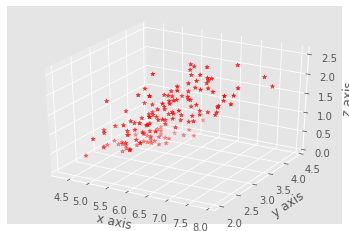

In [79]:
#from matplotlib.axes import Axes, rcParams
from mpl_toolkits.mplot3d import Axes3D 
#from mpl_toolkits.mplot3d import axes3
import matplotlib.pyplot as plt

fig=plt.figure()
ax=fig.add_subplot(111,projection='3d')
df = px.data.iris()
#x=[1,2,3,4,5,6,7,8,9,10]
#y=[5,6,2,3,13,4,1,2,4,8]
#z=[2,3,3,3,5,7,9,11,9,10]
x=df['sepal_length']
y=df['sepal_width']
z=df['petal_width']
ax.scatter(x,y,z,c='r',marker='*')

ax.set_xlabel('x axis')
ax.set_ylabel('y axis')
ax.set_zlabel('z axis')

plt.show()

PLOTLY CHOROPLETH MAP


Every US state and county has an assined ID regulated by the US Federal Government 
under the term FIPS (Federal Information Processing Standards) codes.Combine a state FIPS code
(eg. 06 for California) with a county FIPS code of the state (eg. 059 for Orange county) and this new state-county FIPS code (06059) uniquely refers to the specified state and county.

ff.create_choropleth only needs a list of FIPS codes and a list of values.
Each FIPS code points to one county and 
each corresponding value in values determines the color of the county.

In [66]:
import plotly.figure_factory as ff

import pandas as pd

scope = ['Oregon']
df_sample = pd.read_csv(
    'https://raw.githubusercontent.com/plotly/datasets/master/minoritymajority.csv'
)
df_sample_r = df_sample[df_sample['STNAME'].isin(scope)]
#print(df_sample_r)
values = df_sample_r['TOT_POP'].tolist()#Pandas tolist() is used to convert a series to list.
#print(values)
fips = df_sample_r['FIPS'].tolist()
#print(fips)
colorscale = ["#8dd3c7", "#ffffb3", "#bebada", "#fb8072",
              "#80b1d3", "#fdb462", "#b3de69", "#fccde5",
              "#d9d9d9", "#bc80bd", "#ccebc5", "#ffed6f",
              "#8dd3c7", "#ffffb3", "#bebada", "#fb8072",
              "#80b1d3", "#fdb462", "#b3de69", "#fccde5",
              "#d9d9d9", "#bc80bd", "#ccebc5", "#ffed6f",
              "#8dd3c7", "#ffffb3", "#bebada", "#fb8072",
              "#80b1d3", "#fdb462", "#b3de69", "#fccde5",
              "#d9d9d9", "#bc80bd", "#ccebc5", "#ffed6f"]

fig = ff.create_choropleth(
    fips=fips, values=values, scope=scope,
    colorscale=colorscale, round_legend_values=False,
    county_outline={'color': 'rgb(15, 15, 55)', 'width': 0.5},
    state_outline={'width': 1},
    legend_title='pop. per county',
    title='Oregon'
)

fig.layout.template = None
fig.show()

FIGURE WIDGET


In [80]:
import plotly.graph_objs as go

f = go.FigureWidget()
f.add_scatter(y=[2, 1, 4, 3])
f.add_bar(y=[1, 4, 3, 2])


FigureWidget({
    'data': [{'type': 'scatter', 'uid': '8dde83cf-092d-4491-b0d0-3e3657f5de7b', 'y': [2, 1, 4, …

Comparing:
-One of the main advantages is that only a few lines of codes are necessary to create aesthetically pleasing, interactive plots
-Makes it easy to modify and export your plot
-Offers a more ornate visualization, which is well-suited for conveying the important insights hidden within your dataset.

Just like matplotlib, Plotly also has a few tools that allow it to easily integrate with pandas to make plotting even more efficient.


THANKYOU